# **Supervised machine learning: linear regression**

In [2]:
# Import libraries and modules

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency

# path
path = r"D:\0 - Data Analytics\6 - Advanced Analytics & Dashboard Design\UFC Analysis"

# import the dataframe
UFC_df = pd.read_csv(
    os.path.join(path, "02 Data", "Prepared Data", "UFC_cleaned_V2.csv")
)

## **Hypothesis 1: Fights with Closer Betting Odds Are More Competitive** // Linear Regression
- **Null (H0):** Fights with closer betting odds (small odds differences) do **not differ** significantly in duration or finish method compared to fights with large odds differences.
- **Alternative (H1):** Fights with closer betting odds are significantly **more likely** to last longer and result in decisions, indicating greater competitiveness.

### Clean and select relevant columns for the Linear regression

In [3]:
# Filter relevant columns
UFC_df = UFC_df[["RedOdds", "BlueOdds", "TotalFightTimeSecs"]].copy()

In [4]:
# Drop rows with missing or extreme values, elimnate invalid durations
UFC_df.dropna(inplace=True)
UFC_df = UFC_df[UFC_df["TotalFightTimeSecs"] > 0]

In [5]:
# Create new feature: Odds Difference (absolute value)
UFC_df["OddsDiff"] = np.abs(UFC_df["RedOdds"] - UFC_df["BlueOdds"])

In [6]:
# Define independent (X) and dependent (y) variables
X = UFC_df[["OddsDiff"]]
y = UFC_df["TotalFightTimeSecs"]

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predict
y_pred = model.predict(X_test)

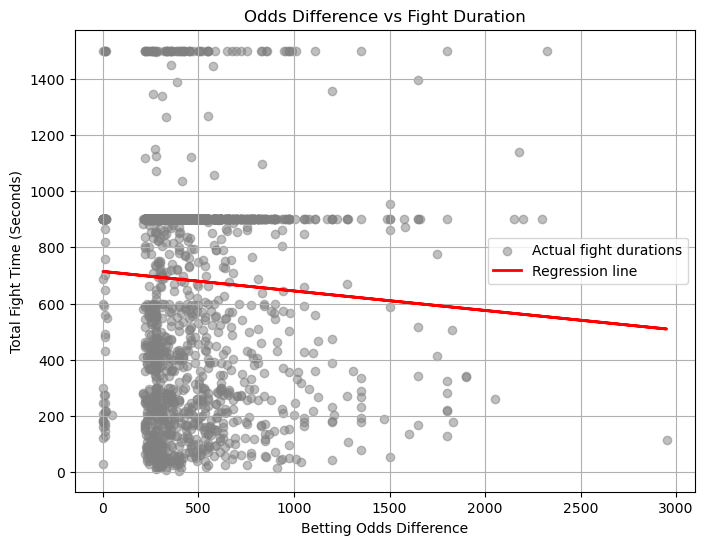

In [10]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="gray", alpha=0.5, label="Actual fight durations")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression line")
plt.title("Odds Difference vs Fight Duration")
plt.xlabel("Betting Odds Difference")
plt.ylabel("Total Fight Time (Seconds)")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# save the plot
plt.savefig(
    os.path.join(
        path,
        "04 Analysis",
        "Visualizations",
        "OddsDiff_vs_FightDuration_Linear_Regression.png",
    )
)

<Figure size 640x480 with 0 Axes>

In [12]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print("Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Model Performance:
Mean Squared Error: 126685.5283487085
R² Score: 0.002285929798107711


We hypothesized that fights with closer betting odds (i.e., smaller differences between Red and Blue odds) would be more competitive, and therefore last longer.

To test this, we ran a linear regression with `OddsDiff` (the absolute difference between betting odds) as the independent variable, and `TotalFightTimeSecs` as the dependent variable.

### Result Summary:

- **R² Score:** 0.0023
- **Mean Squared Error:** 126,685.53
- The regression line showed a **slightly negative slope**, suggesting that smaller odds differences **might** correlate with slightly longer fight durations.

### Interpretation:

While the trend was in the expected direction, the relationship is **extremely weak**. Only **0.23%** of the variance in fight duration is explained by odds differences. Therefore, we **fail to reject the null hypothesis**.

**Conclusion:** Closer odds alone do not meaningfully predict fight duration. More variables may be needed to assess competitiveness—such as round-by-round stats, strike counts, or control time.


### **Check model performance** 

### Compare predicted vs actual values

In [14]:
# Compare actual vs predicted values
comparison_df = pd.DataFrame(
    {"Actual Fight Time": y_test.values, "Predicted Fight Time": y_pred}
)

# Show sample
comparison_df.head(10)

,Actual Fight Time,Predicted Fight Time
0,834,693.419605
1,900,713.547453
2,122,670.515501
3,506,683.008648
4,751,669.821437
5,278,699.666178
6,738,695.501796
7,365,696.195860
8,79,698.278051
9,275,695.501796


### Reflections on Data Bias and Limitations

While the model was technically valid, several **biases and limitations** in the data may have influenced the poor performance:

- **Betting Odds Are Market-Driven**: Odds are not pure reflections of fighter quality; they also capture public sentiment, betting volume, and bookmaker margins. That introduces noise unrelated to actual performance.
  
- **Missing Contextual Features**: Fight duration is likely affected by many factors not included in this model—such as weight class, fighter style, experience, fight type (title vs non-title), and last-minute injuries or changes. Without those, the model lacks depth.

- **Non-Linearity**: The relationship between odds and fight competitiveness may not be linear. A more advanced model (e.g., polynomial regression or tree-based methods) could better capture this.

- **Uneven Distribution**: Some fights are outliers (very short or very long), and the distribution of `OddsDiff` may be skewed toward low or high ends, weakening the signal.

This model illustrates that even a hypothesis that *makes sense logically* may not produce useful predictions without the right features or modeling approach. A more robust feature set or classification model might yield better insight.


### Final Thoughts on the Model

This linear regression did not support the hypothesis that smaller betting odds differences predict longer fight durations. The model had extremely low explanatory power (R² = 0.0023), and predicted durations remained close to the mean across all test cases.

It's likely that the relationship between odds and fight dynamics is non-linear or driven by more complex interactions. Future models could benefit from including additional features such as fight type (title/non-title), fighter experience, or round-by-round performance data.
